In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv')

In [3]:
df.shape

(5572, 5)

In [4]:
# 1. Data Cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation
# 6. Imporvement
# 7. Website
# 8. Deploy

<h2> Data Cleaning</h2>

In [5]:
df.info

<bound method DataFrame.info of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will �_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN

In [6]:
# drop last 3 column
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [7]:
df.sample(5)

,v1,v2
4901,spam,* FREE* POLYPHONIC RINGTONE Text SUPER to 8713...
1472,ham,Just sent you an email ��� to an address with ...
497,ham,Some of them told accenture is not confirm. Is...
2923,ham,Thts god's gift for birds as humans hav some n...
3761,spam,FREE for 1st week! No1 Nokia tone 4 ur mob eve...


In [8]:
# renaming the columnn
df.rename(columns={'v1':'targets', 'v2':'text'}, inplace = True)
df.sample(5)

,targets,text
5481,ham,Shall call now dear having food
754,ham,Realy sorry-i don't recognise this number and ...
34,spam,Thanks for your subscription to Ringtone UK yo...
2165,ham,I'm not coming home 4 dinner.
923,ham,She went to attend another two rounds today..b...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()



In [10]:
df['targets'] = encoder.fit_transform(df['targets'])

In [11]:
df.isnull().sum()

targets    0
text       0
dtype: int64

In [12]:
#check the duplicate values
df = df.drop_duplicates(keep='first')


In [13]:
df.duplicated().sum()

0

In [14]:
df.shape

(5169, 2)

<h2> 2. EDA </h2>

In [15]:
df['targets'].value_counts()

targets
0    4516
1     653
Name: count, dtype: int64

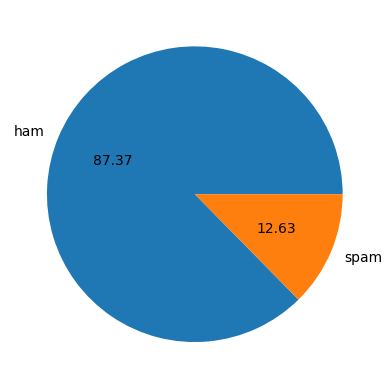

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['targets'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [17]:
# Data is imbalanced
import nltk

In [18]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\as799\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
df['num_characters'] = df['text'].apply(len)

C:\Users\as799\AppData\Local\Temp\ipykernel_26464\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [20]:
df.head(5)

,targets,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
#num of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\as799\AppData\Local\Temp\ipykernel_26464\4001859588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [22]:
df.head(5)

,targets,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
# number of sentences
df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\as799\AppData\Local\Temp\ipykernel_26464\2199360496.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentence'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [24]:
df.head(5)

,targets,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# ham
df[df['targets'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# spam
df[df['targets'] == 1][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [28]:
import seaborn as sns


<Axes: xlabel='num_characters', ylabel='Count'>

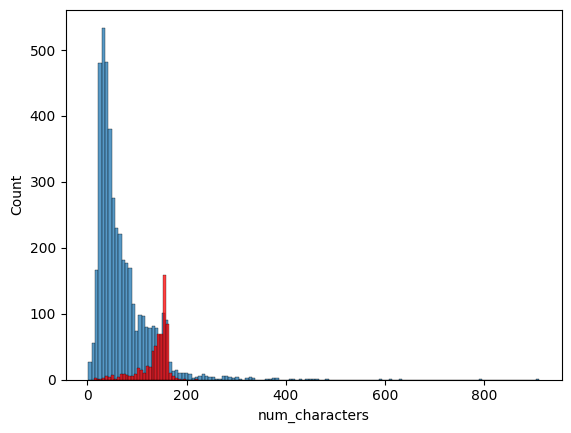

In [29]:
#ham
sns.histplot(df[df['targets'] ==0 ]['num_characters'])
#spam
sns.histplot(df[df['targets'] ==1 ]['num_characters'],color = 'red')

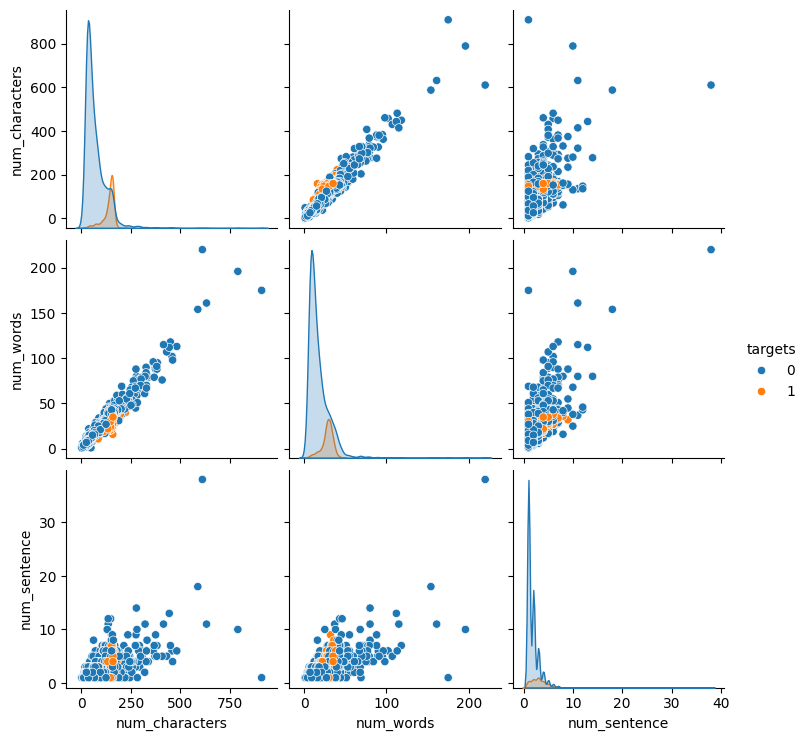

In [30]:
sns.pairplot(df,hue='targets')

In [31]:
df.head(5)

,targets,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


<h2> 3. Text Preprocessing </h2>

Lower case,Tokenization,Removing Special Charater,Removing stop words and punctuation,Stemming 

In [32]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\as799\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [33]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [36]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [37]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\as799\AppData\Local\Temp\ipykernel_26464\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [38]:
df.head(5)

,targets,text,num_characters,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [39]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [40]:
spam_wc = wc.generate(df[df['targets'] == 1]['transformed_text'].str.cat(sep = " "))

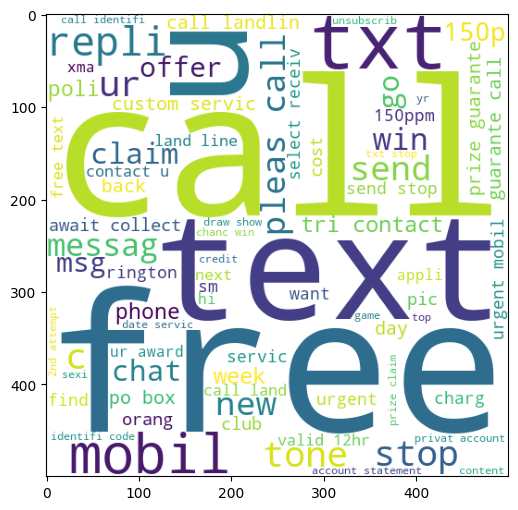

In [41]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [42]:
ham_wc = wc.generate(df[df['targets'] == 0]['transformed_text'].str.cat(sep = " "))

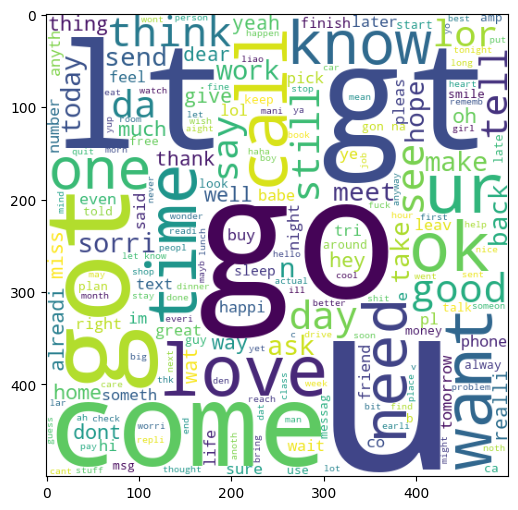

In [43]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [46]:
spam_corpus = []
for msg in df[df['targets'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [47]:
len(spam_corpus)

9941

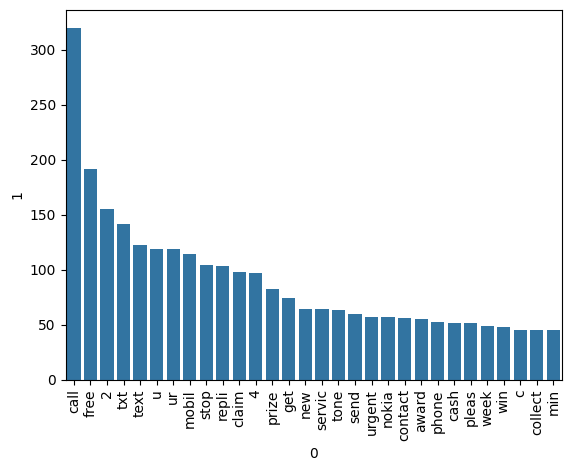

In [48]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [51]:
ham_corpus = []
for msg in df[df['targets'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)


In [52]:
len(ham_corpus)

35305

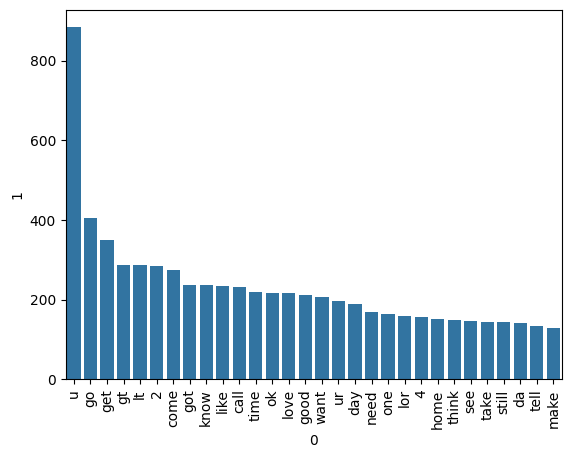

In [53]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],
            y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

<h2>4. Model Building</h2>

In [72]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [73]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [74]:
X.shape

(5169, 6677)

In [75]:
y = df['targets'].values

In [76]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [77]:
from sklearn.model_selection import train_test_split


In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [79]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score


In [80]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [81]:
gnb = GaussianNB
mnb = MultinomialNB
bnb = BernoulliNB


In [82]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

AttributeError: 'numpy.ndarray' object has no attribute '_validate_params'